# Business Data Analysis Scenario

## 배경

- 도시팽창에 따른 교통혼잡이 주된 사회 문제를 해결하기 위해 '통합거리 비례제'를 통한 환승통행(버스 , 지하철, 버스-지하철)이 시행되고 있다.
- 최근들어 시장에서는 온디맨드 서비스(ex : 우버, 배달의 
 
- 온디맨드 서비스 : 고객의 요구나 수요에 대응하는 '주문형 서비스'
- 수요와 공급에 따른 수단별 Circuity(효율성)을 확인, 수요 시장의 위치를 찾아나가야 한다.

-- 온디맨드 서비스 최적 입지 조건 분석 (스마트카드 데이터 대중교통망 Circuity 활용)
1. 도로 교통망 혹은 모빌리티 서비스의 '직결성' 측면에서의 효율성을 판단하는 기준

2. 버스, 지하철, 버스-지하철 환승통해에대한 수단별 Circuity.

3. 서울시 내에서 온디맨드 서비스가 어느지점을 공략해야하는가?

- 혼잡한 지점, 평균 대기시간이 긴 지점 주변을 공략하면, 분산되는 효과로 많이 이용할 것이다.
- 지하철 이용도가 저조한 지점, 역과의 거리가 너무 먼지점. 은 택시를 타야되니까 많이 이용할 것이다.

- 산악지점, 대중교통이 미비한 지점에도 온디맨드 서비스가 필요할 것이다.
- circuity가 큰 지점은 빙빙 돌아가게 되므로 온디맨드 서비스가 필요할 것이다. => 대기 시간 / 이용 시간이 증가하게 됨. 택시 이용의 원인


In [26]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력
import missingno as msno
import seaborn as sns

%matplotlib inline
# 그래프 설정 한글폰트
if os.name == 'nt': # 윈도우 사용자
    mpl.rc('font', family = 'Malgun Gothic')
elif os.name == 'posix': # 맥 사용자
    mpl.rc('font', family = 'AppleGothic')
else:
    print('check your os')

mpl.rc("axes", unicode_minus=True)
pd.options.display.max_columns = 50
pd.options.display.max_rows = 50
# 그래프의 한글을 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프에서 음수값 나올 때, 깨지는 현상 방지
mpl.rc('axes', unicode_minus = False)

import warnings
warnings.filterwarnings('ignore')
# 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

# 이상치 측정용 스케일
from sklearn.preprocessing import scale, minmax_scale , robust_scale
import matplotlib


In [27]:
path = 'C:/Users/user/Desktop/TodayLearn/TiL/Code/Project2/Projcet02/1_smart_card_data/'
data1 = pd.read_csv(f'{path}/smartcard_Chain.csv', encoding = 'cp949')

In [28]:
data1 = pd.read_csv(f'{path}/smartcard_Chain.csv', encoding = 'cp949')

In [29]:
# 데이터 결측치 확인
data1.head()

data1.isnull().sum()

card_name               0
Bus                     0
Subway                  0
on_area_name            0
on_lon                  0
on_lat                  0
on_dong                 0
on_hour                 0
on_minute               0
on_second               0
off_area_name           0
off_lon                 0
off_lat                 0
off_dong                0
off_hour                0
off_minute              0
off_second              0
no_transfer             0
total_distance          0
total_time              0
route_id          3398018
Haversine               0
Circuity            72738
dtype: int64

<AxesSubplot:>

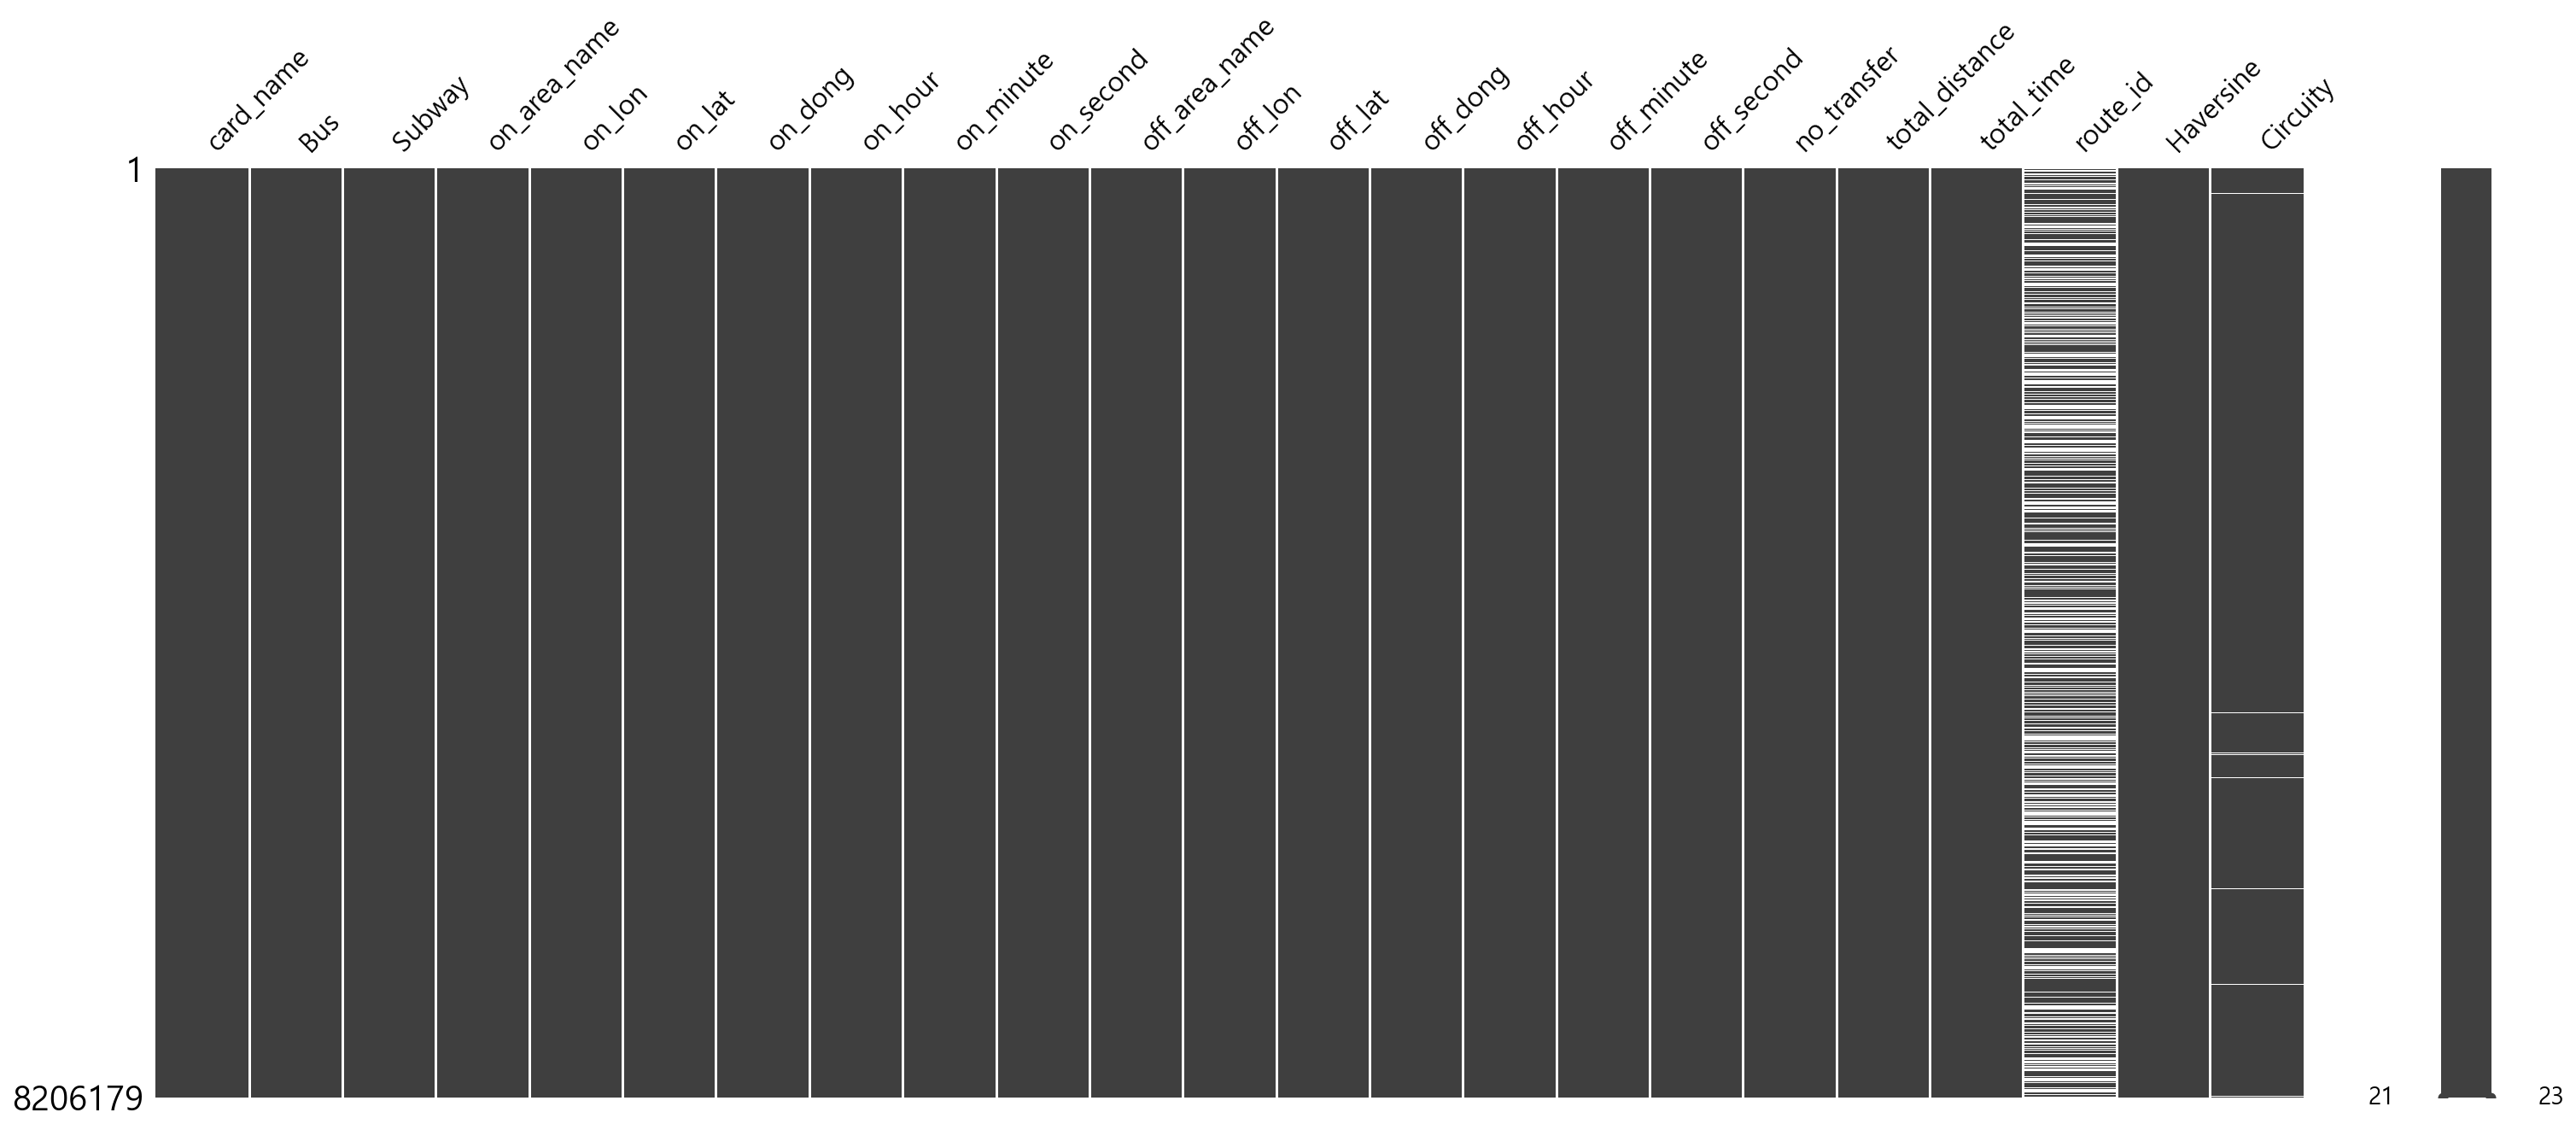

In [13]:
# 데이터 결측 시각화
msno.matrix(data1)

In [15]:
data1['route_id'].head(10)

0           NaN
1           NaN
2           NaN
3    11110803.0
4    11110214.0
5    11110027.0
6    41110070.0
7           NaN
8           NaN
9           NaN
Name: route_id, dtype: float64

In [16]:
data1.head(5)

,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity
0,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,영등포시장역,126.905118,37.522694,1119074,12,42,8,충무로역,126.993624,37.561135,1102060,13,16,20,0,11000,2052,NaN,8897.367673,1.236321
1,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,충무로역,126.993624,37.561135,1102060,16,2,9,중곡역,127.084283,37.565891,1105057,16,36,50,0,9400,2081,NaN,8008.336598,1.173777
2,+++0VxU0B9DrLE4nxWaOzEArKFNI3ep9kMPVTZVHGNM=,False,True,중곡역,127.084283,37.565891,1105057,18,22,39,선유도역,126.893294,37.538159,1119062,19,19,46,0,20100,3427,NaN,17116.783674,1.174286
3,+++19/4InCnN/eZXlK0pT7oFlp3qEbVXHX4NFSiyAN8=,True,False,LG전자.문래중,126.885883,37.520390,1119076,16,11,56,문래역,126.894412,37.519063,1119076,16,15,3,0,768,187,11110803.0,766.539891,1.001905
4,+++3lFnkOIxAPXhin+oeJBZJeI8l5KOhgxcjhFqGTlc=,True,False,강남구청.강남세무서,127.047293,37.518428,1123078,18,4,57,청담동래미안아파트,127.042912,37.517653,1123078,18,6,30,0,397,93,11110214.0,395.878621,1.002833


In [50]:
# Circuity 가 < 1 인 그룹을 찾기

In [62]:
df2 = data1[data1['Circuity'] != 0]

In [85]:
df3 = df2[df2['Circuity'] > 2000].sort_values(by = 'Circuity', ascending = False)

In [86]:
print(df3.shape)
df3.tail(10)
df3.head(10)

(2237, 23)


,card_name,Bus,Subway,on_area_name,on_lon,on_lat,on_dong,on_hour,on_minute,on_second,off_area_name,off_lon,off_lat,off_dong,off_hour,off_minute,off_second,no_transfer,total_distance,total_time,route_id,Haversine,Circuity
3575,+/kQu8QzceRM7t9lIDoo36YS4B0qOoZsUSRGXpOjcHI=,True,False,고덕초등학교,127.165392,37.560168,1125056,15,48,8,고덕초등학교,127.165392,37.560168,1125056,16,37,15,2,4600,1239,11110212.0,0.0,inf
5471701,eeU1h3FpHpQTC/6BeEJ+648stVixhw6R+y230y3V6tY=,True,True,대흥역,126.942477,37.547619,1114060,16,21,6,대흥역,126.942477,37.547619,1114060,17,55,47,2,20474,4205,41110213.0,0.0,inf
5446248,eRcdxXDOmFbnH/4/qGXcnfHPg207gTNE+HetqFQE6v4=,True,False,서라벌중학교.우이동대우아파트,127.012832,37.654607,1109074,6,23,54,서라벌중학교.우이동대우아파트,127.012832,37.654607,1109074,7,53,49,2,15560,4364,11110970.0,0.0,inf
5448983,eT+QJ9spcMCR2yvXHqY/d6asKBHn+sGfHRHRr5RXYHo=,True,False,교대역5번출구,127.014728,37.493880,1122051,16,50,15,교대역5번출구,127.014728,37.493880,1122051,17,52,10,2,2701,889,11110664.0,0.0,inf
5449166,eT57Mj+SQcP1p3sM1jOp8S8Rf6mfLFdcdaxNdAJwXvU=,True,False,수유역.강북구청,127.025963,37.637718,1109060,15,20,41,수유역.강북구청,127.025963,37.637718,1109060,15,58,39,1,3298,1070,11110521.0,0.0,inf
5457629,eXMOA9XRPfE3LA3sNhyvllqx5foO7289G33AoXbhXas=,True,False,극동상가,126.974108,37.491712,1120073,15,4,16,극동상가,126.974108,37.491712,1120073,15,56,53,1,3210,1439,11110600.0,0.0,inf
5458581,eXtXeL+CGEXPkVS0m3rf8g==,True,True,고속터미널역,127.005069,37.503391,1122059,15,30,56,고속터미널역,127.005069,37.503391,1122059,16,21,17,2,12959,2109,11110535.0,0.0,inf
5468234,ecm3XCH3oen+6gKWc1CM6TPA/0OQTnxW8R3nTd3OO3Q=,True,True,구로디지털단지역,126.901596,37.485243,1119071,10,34,14,구로디지털단지역,126.901596,37.485243,1119071,12,5,33,2,32791,4360,11110747.0,0.0,inf
5472464,eeveVgtJevgyiLzjkiGU+rSQXI9lO7ZhhezCskJ+Uxc=,True,True,서울대입구역,126.952685,37.481250,1121061,20,33,13,서울대입구역,126.952685,37.481250,1121061,22,6,24,3,17528,3091,11110706.0,0.0,inf
5527682,f4aIkd0CuN5bwemyDsdtYiTr7WFHX5fA7Vkh3Y4Re6Y=,True,True,종합운동장역,127.073861,37.511075,1124079,17,22,15,종합운동장역,127.073861,37.511075,1124079,19,28,3,2,27525,5741,11110968.0,0.0,inf


In [ ]:
# 혼잡함을 판단하는 척도
# 총 이동거리 - 

<AxesSubplot:xlabel='Circuity'>

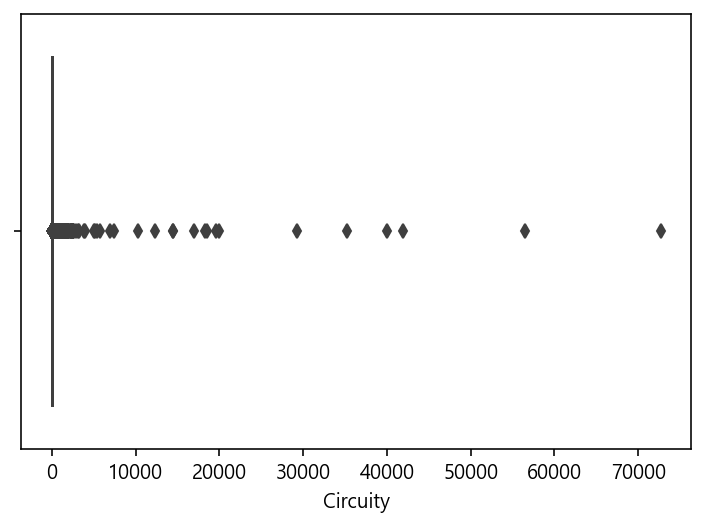

In [84]:
sns.boxplot(data1['Circuity'])